# CMSC471 Artificial Intelligence

# Project Final Submission

## Project Title: Video Game Sales with Ratings

Zippy Cahn ID: ER57013

## Problem Description

- Specify exactly what ML approach your problem is: Binary classification, multi-class classification, or regression (groups should work on two approaches).

This is a multi-class classification problem. I plan on using all of the features to try and perdict the ESRB rating (final collum) for video games.  


- Then, explain the problem further. Be clear and concise.

The problem is trying to classify a game's ESRB rating using their different features.  This may help companies determine which kind of game they should devlope and what their rival companies are developing.

## Motivation

Explain briefly why this problem is important and how you became interested in it. You may use the motivation from the proposal.

I am currently trying to get into the gaming industry and this interests me.

## Dataset

- Link to dataset source: https://www.kaggle.com/rush4ratio/video-game-sales-with-ratings

- <b>Label/target</b> description - What column in your dataset you are trying to predict? Specify exactly what your target feature (label) is. It must be one of the dataset columns. For image classification, specify your class labels.

The target is to predict a game's rating.  I will be using all the features except the name feature to accomplish this.

- Feature description: briefly explain each of the features/columns.


- Platform: What console/platform the game is one. 
- Year_of_release: The year the game was released.
- Genre: The game's genre.
- Publisher: the company who created the game.
- NA_Sales: North America sales.
- EU_Sales: Europe sales.
- JP_Sales: Japan sales.
- other_Sales: Other countries sales.
- Global_Sales: All sales.
- Critic_score: Aggregate score compiled by Metacritic staff.
- Critic_count: The number of critics used in coming up with the Critic_score.
- User_score: Score by Metacritic's subscribers.
- User_count: Number of users who gave the user_score.
- Developer: Party responsible for creating the game.
- Rating: The ESRB ratings.


- Include the code for loading, showing the data head (if loaded with pandas) and reporting the data shape via sklearn, pandas or tensorflow in the following cell. 


- For image classification or special non-pandas datasets, show at least one sample of the data.


- <b>Your data should be loaded error-free (otherwise your whole project gets zero credit). You should attach the data to your final project submission in a zip file.</b> If your dataset is too large and can't be uploaded in Blackboard, you should email the dataset to the instructor BEFORE the deadline!

## <font color="red"> Required Coding

In [2]:
# Import necessary Python, sklearn and/or tensorflow/keras modules for loading the dataset
import pandas as pd
import numpy as np

from sklearn.model_selection import train_test_split
import sklearn.metrics as metrics

from sklearn.ensemble import RandomForestClassifier

from sklearn.model_selection import cross_val_score
import sklearn.metrics as metrics

import tensorflow as tf

import matplotlib.pyplot as plt
%matplotlib inline

import warnings
warnings.filterwarnings("ignore")
# Load the data

game_data = pd.read_csv('video.csv', encoding = "ISO-8859-1")

# Print data shape via built-in methods of sklearn, pandas or tensorflow/keras (or other modules)

In [3]:
print("tf Version: ", tf.__version__)
print("Eager Execution mode: ", tf.executing_eagerly())

tf Version:  2.0.0
Eager Execution mode:  True


In [4]:
# Show the data head (if pandas is used)
# If the dataset contains images or is non-pandas/non-tabular, show at least one sample of the data
# Get data shape via built-in methods of sklearn, pandas or tensorflow/keras
print(game_data.shape)
game_data.head()

(16719, 16)


,Name,Platform,Year_of_Release,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Critic_Score,Critic_Count,User_Score,User_Count,Developer,Rating
0,Wii Sports,Wii,2006.0,Sports,Nintendo,41.36,28.96,3.77,8.45,82.53,76.0,51.0,8,322.0,Nintendo,E
1,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24,NaN,NaN,NaN,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.68,12.76,3.79,3.29,35.52,82.0,73.0,8.3,709.0,Nintendo,E
3,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.61,10.93,3.28,2.95,32.77,80.0,73.0,8,192.0,Nintendo,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37,NaN,NaN,NaN,NaN,NaN,NaN


## Data Preprocessing

List any steps you have taken for preprocessing, such as cleaning, dropping NAs, dropping any redundant/irrelevant column, normalizing/scaling, etc. HERE:

- Preprocessing Steps:  I droped the NAs and the names collum.  I also converted the objects to to ints.  I also normalized them.  I then split the data with a 0.2 test size.  
<br>

- Specify the details of data splitting to train/test or cross validation. Mention the ratio for splitting and number of folds for cv.
<br>

I changed it from 0.2 to 0.33 which gave better results.

<b>Notice:</b> Each dataset may or may not need specific preprocessing steps. You should decide which preprocessing steps (if any) is required for your particular dataset.

## <font color="red"> Required Coding

In [5]:
# Import necessary preprocessing modules

import pandas as pd
import numpy as np

from sklearn.model_selection import train_test_split
import sklearn.metrics as metrics

from sklearn.ensemble import RandomForestClassifier

from sklearn.model_selection import cross_val_score
import sklearn.metrics as metrics

import tensorflow as tf

import matplotlib.pyplot as plt
%matplotlib inline

import warnings
warnings.filterwarnings("ignore")


In [6]:
# Data Preprocessing code here
#get rid of na's
game_data.dropna(inplace=True)
print(game_data.shape)
game_data.head()
game_data[:200]

(6825, 16)


,Name,Platform,Year_of_Release,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Critic_Score,Critic_Count,User_Score,User_Count,Developer,Rating
0,Wii Sports,Wii,2006.0,Sports,Nintendo,41.36,28.96,3.77,8.45,82.53,76.0,51.0,8,322.0,Nintendo,E
2,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.68,12.76,3.79,3.29,35.52,82.0,73.0,8.3,709.0,Nintendo,E
3,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.61,10.93,3.28,2.95,32.77,80.0,73.0,8,192.0,Nintendo,E
6,New Super Mario Bros.,DS,2006.0,Platform,Nintendo,11.28,9.14,6.50,2.88,29.80,89.0,65.0,8.5,431.0,Nintendo,E
7,Wii Play,Wii,2006.0,Misc,Nintendo,13.96,9.18,2.93,2.84,28.92,58.0,41.0,6.6,129.0,Nintendo,E
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
284,Half-Life,PC,1997.0,Shooter,Vivendi Games,4.03,0.00,0.09,0.00,4.12,96.0,24.0,9.1,3161.0,Valve Software,M
288,World of Warcraft: The Burning Crusade,PC,2007.0,Role-Playing,Activision,2.57,1.52,0.00,0.00,4.09,91.0,46.0,7.9,785.0,Blizzard Entertainment,T
289,Battlefield 1,PS4,2016.0,Shooter,Electronic Arts,1.10,2.15,0.21,0.61,4.08,88.0,31.0,8.4,809.0,EA DICE,M
290,God of War II,PS2,2007.0,Action,Sony Computer Entertainment,2.32,0.04,0.04,1.67,4.07,93.0,70.0,8.9,709.0,SCE Santa Monica,M


In [7]:
#get rid of name's  they are unnecessary
game_data = game_data.drop("Name", axis=1)
print(game_data.shape)
game_data.head()
game_data[:100]

(6825, 15)


,Platform,Year_of_Release,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Critic_Score,Critic_Count,User_Score,User_Count,Developer,Rating
0,Wii,2006.0,Sports,Nintendo,41.36,28.96,3.77,8.45,82.53,76.0,51.0,8,322.0,Nintendo,E
2,Wii,2008.0,Racing,Nintendo,15.68,12.76,3.79,3.29,35.52,82.0,73.0,8.3,709.0,Nintendo,E
3,Wii,2009.0,Sports,Nintendo,15.61,10.93,3.28,2.95,32.77,80.0,73.0,8,192.0,Nintendo,E
6,DS,2006.0,Platform,Nintendo,11.28,9.14,6.50,2.88,29.80,89.0,65.0,8.5,431.0,Nintendo,E
7,Wii,2006.0,Misc,Nintendo,13.96,9.18,2.93,2.84,28.92,58.0,41.0,6.6,129.0,Nintendo,E
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
139,PS,1999.0,Action,GT Interactive,3.11,2.80,0.02,0.33,6.27,87.0,22.0,8.1,78.0,Reflections Interactive,T
140,X360,2011.0,Shooter,Microsoft Game Studios,4.05,1.59,0.07,0.50,6.21,91.0,96.0,7.8,1504.0,Epic Games,M
141,X360,2010.0,Sports,Microsoft Game Studios,3.92,1.73,0.03,0.51,6.19,73.0,51.0,7.4,95.0,Rare Ltd.,E10+
142,X360,2006.0,Shooter,Microsoft Game Studios,3.54,1.88,0.07,0.60,6.09,94.0,88.0,8.3,2295.0,Epic Games,M


In [8]:
# Get the feature data types.
game_data.dtypes

Platform            object
Year_of_Release    float64
Genre               object
Publisher           object
NA_Sales           float64
EU_Sales           float64
JP_Sales           float64
Other_Sales        float64
Global_Sales       float64
Critic_Score       float64
Critic_Count       float64
User_Score          object
User_Count         float64
Developer           object
Rating              object
dtype: object

In [9]:
# Split to train/test sets code here (if applicable)

X = set(game_data.columns) 
X = game_data.drop("Rating", axis=1) 
y = game_data['Rating'] 



In [10]:
print(X.shape)
print(y.shape)
X.head()

(6825, 14)
(6825,)


,Platform,Year_of_Release,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Critic_Score,Critic_Count,User_Score,User_Count,Developer
0,Wii,2006.0,Sports,Nintendo,41.36,28.96,3.77,8.45,82.53,76.0,51.0,8,322.0,Nintendo
2,Wii,2008.0,Racing,Nintendo,15.68,12.76,3.79,3.29,35.52,82.0,73.0,8.3,709.0,Nintendo
3,Wii,2009.0,Sports,Nintendo,15.61,10.93,3.28,2.95,32.77,80.0,73.0,8,192.0,Nintendo
6,DS,2006.0,Platform,Nintendo,11.28,9.14,6.50,2.88,29.80,89.0,65.0,8.5,431.0,Nintendo
7,Wii,2006.0,Misc,Nintendo,13.96,9.18,2.93,2.84,28.92,58.0,41.0,6.6,129.0,Nintendo


In [10]:
y.head()

0    E
2    E
3    E
6    E
7    E
Name: Rating, dtype: object

In [11]:
X = pd.get_dummies(X, prefix='', prefix_sep='')

print(X.shape)
X.head()
X[:200]

(6825, 1678)


,Year_of_Release,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Critic_Score,Critic_Count,User_Count,3DS,...,h.a.n.d. Inc.,iNiS,id Software,"id Software, Nerve Software","id Software, Raven Software",n-Space,neo Software,odenis studio,syn Sophia,zSlide
0,2006.0,41.36,28.96,3.77,8.45,82.53,76.0,51.0,322.0,0,...,0,0,0,0,0,0,0,0,0,0
2,2008.0,15.68,12.76,3.79,3.29,35.52,82.0,73.0,709.0,0,...,0,0,0,0,0,0,0,0,0,0
3,2009.0,15.61,10.93,3.28,2.95,32.77,80.0,73.0,192.0,0,...,0,0,0,0,0,0,0,0,0,0
6,2006.0,11.28,9.14,6.50,2.88,29.80,89.0,65.0,431.0,0,...,0,0,0,0,0,0,0,0,0,0
7,2006.0,13.96,9.18,2.93,2.84,28.92,58.0,41.0,129.0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
284,1997.0,4.03,0.00,0.09,0.00,4.12,96.0,24.0,3161.0,0,...,0,0,0,0,0,0,0,0,0,0
288,2007.0,2.57,1.52,0.00,0.00,4.09,91.0,46.0,785.0,0,...,0,0,0,0,0,0,0,0,0,0
289,2016.0,1.10,2.15,0.21,0.61,4.08,88.0,31.0,809.0,0,...,0,0,0,0,0,0,0,0,0,0
290,2007.0,2.32,0.04,0.04,1.67,4.07,93.0,70.0,709.0,0,...,0,0,0,0,0,0,0,0,0,0


In [12]:
# Get the feature data types.
X.dtypes

Year_of_Release    float64
NA_Sales           float64
EU_Sales           float64
JP_Sales           float64
Other_Sales        float64
                    ...   
n-Space              uint8
neo Software         uint8
odenis studio        uint8
syn Sophia           uint8
zSlide               uint8
Length: 1678, dtype: object

In [13]:
# Get the feature data types.
y.unique()

array(['E', 'M', 'T', 'E10+', 'AO', 'K-A', 'RP'], dtype=object)

In [14]:
#convert from categorical values to numerical
y = y.map(lambda x: {'E' :0, 'E10+' :1, 'T' :2, 'M' :3, 'AO' :4, 'K-A' :5, 'RP' :6}.get(x))
y.head()



0    0
2    0
3    0
6    0
7    0
Name: Rating, dtype: int64

In [15]:
# Get the feature data types.
y.unique()

array([0, 3, 2, 1, 4, 5, 6], dtype=int64)

In [16]:
# Normalize X 
X = (X - X.mean())/X.std()
print(X.shape)
X.head()

(6825, 1678)


,Year_of_Release,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Critic_Score,Critic_Count,User_Count,3DS,...,h.a.n.d. Inc.,iNiS,id Software,"id Software, Nerve Software","id Software, Raven Software",n-Space,neo Software,odenis studio,syn Sophia,zSlide
0,-0.341176,42.346639,41.790569,12.886767,31.004904,41.637276,0.413014,1.147975,0.250716,-0.15243,...,-0.029661,-0.024214,-0.034254,-0.012105,-0.020969,-0.043682,-0.012105,-0.012105,-0.01712,-0.012105
2,0.133743,15.800856,18.221103,12.956315,11.884655,17.694638,0.845647,2.292368,0.909519,-0.15243,...,-0.029661,-0.024214,-0.034254,-0.012105,-0.020969,-0.043682,-0.012105,-0.012105,-0.01712,-0.012105
3,0.371202,15.728496,15.558627,11.182831,10.624793,16.294037,0.701436,2.292368,0.029412,-0.15243,...,-0.029661,-0.024214,-0.034254,-0.012105,-0.020969,-0.043682,-0.012105,-0.012105,-0.01712,-0.012105
6,-0.341176,11.252514,12.954346,22.380122,10.365410,14.781388,1.350385,1.876225,0.436270,-0.15243,...,-0.029661,-0.024214,-0.034254,-0.012105,-0.020969,-0.043682,-0.012105,-0.012105,-0.01712,-0.012105
7,-0.341176,14.022868,13.012543,9.965734,10.217191,14.333196,-0.884885,0.627797,-0.077835,-0.15243,...,-0.029661,-0.024214,-0.034254,-0.012105,-0.020969,-0.043682,-0.012105,-0.012105,-0.01712,-0.012105


In [17]:
# Split the data to train and test with test_size=0.20

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2) 


print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(5460, 1678)
(5460,)
(1365, 1678)
(1365,)


## Methods

List your sklearn and tensorflow methods HERE:

1- Sklearn Method No.1: Random Forest

2- Sklearn Method No.2: MLPClassifier

3- Tensorflow Method: Neural Network

Individual students need to work with 2 sklearn methods and 1 tensorflow method.

Groups should take 2 approaches (both classification and regression) on 1 or 2 datasets, and for each approach (classification/regression) should use 3 methods as described above (6 methods totally).

<b>Notice:</b> You should fine-tune at least one hyperparameter of each method by using multiple values (at least 3 different values).

## <font color="red"> Required Coding - Groups should add more cell as required

In [18]:
# Import any necessary method/algorithm modules from sklearn and tf/keras here

import pandas as pd
import numpy as np

from sklearn.model_selection import train_test_split
import sklearn.metrics as metrics


from sklearn.ensemble import RandomForestClassifier
from sklearn.neural_network import MLPClassifier

from sklearn.model_selection import cross_val_score
import sklearn.metrics as metrics
from sklearn.linear_model import Perceptron

from sklearn.metrics import classification_report

import tensorflow as tf

import matplotlib.pyplot as plt
%matplotlib inline

import warnings
warnings.filterwarnings("ignore")

In [19]:
# Sklearn Method 1 code here random forest

In [20]:
# Create a RandomForestClassifier with n_estimators=100, max_leaf_nodes=16, n_jobs=-1
rf_clf = RandomForestClassifier(n_estimators=100, max_leaf_nodes=16, n_jobs=-1) 
# Perform a 10-fold cross validation with scoring 'roc_auc'
# Hint: cross validation should be done on the whole dataset

rf_cv_score = cross_val_score(rf_clf, X, y)

### END CODING HERE ###

print("Mean cv Score - Random Forest: ", rf_cv_score.mean())

Mean cv Score - Random Forest:  0.5009215297583584


In [21]:
# Fit the rf_clf on the training set
rf_clf.fit(X_train,y_train)

# Get feature_importances of rf for all features
for name, score in zip(game_data, rf_clf.feature_importances_):
    print(name, score)

Platform 0.03390739910194947
Year_of_Release 0.01361243039224714
Genre 0.017088690359052628
Publisher 0.01234546469482797
NA_Sales 0.005342462961380385
EU_Sales 0.009649959113460975
JP_Sales 0.014944774551477486
Other_Sales 0.047343928019926616
Global_Sales 0.0843457445771441
Critic_Score 0.0
Critic_Count 0.0001886507697079949
User_Score 0.01565531388332993
User_Count 0.01535729230122567
Developer 0.0020306218050619566
Rating 0.008432087828628067


In [24]:
y_pred = rf_clf.predict(X_test)

In [28]:

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.73      0.78      0.76       413
           1       1.00      0.06      0.11       175
           2       0.50      0.83      0.62       488
           3       0.83      0.31      0.45       288
           6       0.00      0.00      0.00         1

    accuracy                           0.60      1365
   macro avg       0.61      0.39      0.39      1365
weighted avg       0.70      0.60      0.56      1365



In [22]:
# Sklearn Method 2 code here MLPClassifier

In [44]:
# Create a MLPClassifier with activation = 'relu', solver='sgd', hidden_layer_sizes=(100,150),random_state=1) 
mlp_clf = MLPClassifier(activation = 'relu', solver='sgd', hidden_layer_sizes=(100,150),random_state=1) 

mlp_cv_score = cross_val_score(mlp_clf, X, y)

### END CODING HERE ###

print("Mean cv Score - MLPClassifier: ", mlp_cv_score.mean())

Mean cv Score - MLPClassifier:  0.636003969923233


In [45]:
# Fit the mlp_clf on the training set

mlp_clf = Perceptron(tol=1e-3, random_state=0)
mlp_clf.fit(X, y)

coeffs = mlp_clf.coef_

print(coeffs)



[[-160.66806363  -20.76529757   76.41746736 ...  -73.40199516
    13.028072    -73.40199516]
 [ 106.20564952   23.5699802   -56.28290236 ...   97.11480989
   -37.91151834  -68.11230653]
 [ -93.55409598  -42.66456833   -1.43483503 ...  -76.68232839
   -50.03224761   88.54478803]
 ...
 [   8.56600092    1.66321217   -6.29366009 ...  -66.06663747
   -35.01829341  -66.06663747]
 [   4.01610664    0.34430637  -18.10066287 ...  -66.51450584
   -35.65172135   16.09905237]
 [   6.909283     -2.3822002    -3.49276388 ...  -66.45398309
   -35.56612298   16.15957512]]


In [46]:
y_pred = mlp_clf.predict(X_test)

In [47]:

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.84      0.89      0.86       413
           1       0.63      0.62      0.63       175
           2       0.80      0.76      0.78       488
           3       0.84      0.79      0.82       288
           4       0.00      0.00      0.00         0
           5       0.00      0.00      0.00         0
           6       0.20      1.00      0.33         1

    accuracy                           0.79      1365
   macro avg       0.47      0.58      0.49      1365
weighted avg       0.80      0.79      0.79      1365



In [25]:
# Tensorflow/keras Method code here

In [29]:
# Load train and test data to tf
train_tensor = tf.data.Dataset.from_tensor_slices((X_train.values, y_train.values))
test_tensor = tf.data.Dataset.from_tensor_slices((X_test.values, y_test.values))

In [30]:
type(train_tensor)

tensorflow.python.data.ops.dataset_ops.TensorSliceDataset

In [31]:
for feat, targ in train_tensor.take(5):
  print ('Features: {}, Target: {}'.format(feat, targ))

Features: [ 0.37120196 -0.07699467 -0.32893862 ... -0.01210455 -0.01711967
 -0.01210455], Target: 1
Features: [ 0.13374265 -0.22171467 -0.02340852 ... -0.01210455 -0.01711967
 -0.01210455], Target: 0
Features: [-1.5284725  -0.3974461  -0.34348768 ... -0.01210455 -0.01711967
 -0.01210455], Target: 0
Features: [ 1.7959578   2.20751385  4.41405253 ... -0.01210455 -0.01711967
 -0.01210455], Target: 3
Features: [-1.29101319 -0.29407467 -0.2125462  ... -0.01210455 -0.01711967
 -0.01210455], Target: 2


In [32]:
# Batch train and test data
train_batch = train_tensor.shuffle(len(X_train)).batch(10)
test_batch = test_tensor.shuffle(len(X_test)).batch(10)

print(type(train_batch))
print(type(test_batch))

<class 'tensorflow.python.data.ops.dataset_ops.BatchDataset'>
<class 'tensorflow.python.data.ops.dataset_ops.BatchDataset'>


In [33]:
### START CODING HERE ###
# Build a Sequential neural network - a classifier model
def build_model():
    nn_clf = tf.keras.Sequential([
        # Create a dense layer with 1000 units, input_dim=1678, and 'relu' activation function ~ 1 line
        tf.keras.layers.Dense(1000, input_dim=1678, activation='relu'), 
        # Create a dense layer with 500 units, and 'relu' activation function 
        tf.keras.layers.Dense(500, activation='relu'),
        tf.keras.layers.Dense(200, activation='relu'), 
        tf.keras.layers.Dense(70, activation='relu'), 
        tf.keras.layers.Dense(20, activation='relu'), 
      
        #output layer
        tf.keras.layers.Dense(7, activation='softmax')
        ])  
    return nn_clf
### END CODING HERE ###

In [34]:
### START CODING HERE ###
# Compile the model 
model = build_model()
optimizer = tf.keras.optimizers.RMSprop(0.001)
model.compile(optimizer=optimizer, loss='sparse_categorical_crossentropy', metrics=['sparse_categorical_accuracy']) 
### END CODING HERE ###

In [35]:
 nn_clf_historystory = model.fit(train_batch, epochs=20)

Epoch 1/20
546/546 [==============================] - 19s 35ms/step - loss: 1.0465 - sparse_categorical_accuracy: 0.5793
Epoch 2/20
546/546 [==============================] - 13s 23ms/step - loss: 0.7083 - sparse_categorical_accuracy: 0.7401 1s - loss: 0.7056 - sparse_categori
Epoch 3/20
546/546 [==============================] - 15s 27ms/step - loss: 0.6160 - sparse_categorical_accuracy: 0.7885
Epoch 4/20
546/546 [==============================] - 13s 23ms/step - loss: 0.5447 - sparse_categorical_accuracy: 0.8143TA: 2s - loss: 0.
Epoch 5/20
546/546 [==============================] - 12s 22ms/step - loss: 0.4730 - sparse_categorical_accuracy: 0.8344 1s - loss: 0.4726 - sparse_categor
Epoch 6/20
546/546 [==============================] - 15s 27ms/step - loss: 0.4323 - sparse_categorical_accuracy: 0.8540
Epoch 7/20
546/546 [==============================] - 14s 25ms/step - loss: 0.3830 - sparse_categorical_accuracy: 0.8751
Epoch 8/20
546/546 [==============================] - 12s 22ms/st

In [48]:
y_pred = model.predict_classes(X_test)

In [49]:
y_pred

array([0, 2, 0, ..., 2, 2, 0], dtype=int64)

In [50]:

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.77      0.73      0.75       413
           1       0.47      0.59      0.52       175
           2       0.65      0.73      0.69       488
           3       0.84      0.62      0.71       288
           6       0.00      0.00      0.00         1

    accuracy                           0.69      1365
   macro avg       0.55      0.53      0.54      1365
weighted avg       0.71      0.69      0.69      1365



In [ ]:
pd.DataFrame(nn_clf_historystory.history).plot(figsize=(10, 5))
plt.grid(True)

# set the y-axis range to [0-1]
plt.gca().set_ylim(0, 1) 

In [ ]:

# evaluate nn_clf model on test_batch using .evaluate method
model.evaluate(test_batch)


In [35]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 1000)              1679000   
_________________________________________________________________
dense_1 (Dense)              (None, 500)               500500    
_________________________________________________________________
dense_2 (Dense)              (None, 200)               100200    
_________________________________________________________________
dense_3 (Dense)              (None, 70)                14070     
_________________________________________________________________
dense_4 (Dense)              (None, 20)                1420      
_________________________________________________________________
dense_5 (Dense)              (None, 7)                 147       
Total params: 2,295,337
Trainable params: 2,295,337
Non-trainable params: 0
______________________________________________

In [36]:
# Get class probabilities for nn - ignore the warning
nn_preds = model.predict(X_test).ravel()

In [37]:
# See class probabilities predicted by nn classifier
nn_preds[:5]

array([9.999993e-01, 8.125896e-26, 7.043426e-07, 1.354381e-37,
       0.000000e+00], dtype=float32)

In [ ]:
#LEARNING RATE FOR LOOP

In [40]:
### START CODING HERE ###
results = []
histories = []

learning_rates = np.arange(0.001, 0.01, 0.001) 
for lr in learning_rates: #lr is learning rate
    train_batch = train_tensor.shuffle(len(X_train)).batch(32)
    test_batch = test_tensor.shuffle(len(X_test)).batch(32)
    model= build_model()
    optimizer = tf.keras.optimizers.RMSprop(lr) 
    model.compile(optimizer=optimizer, loss='sparse_categorical_crossentropy', metrics=['sparse_categorical_accuracy'])
    nn_clf_historystory = model.fit(train_batch, epochs=20)
    result= model.evaluate(test_batch)
    print("lr",lr)

    results.append(result)
    histories.append(nn_clf_historystory)
    
### END CODING HERE ###

Epoch 1/20
171/171 [==============================] - 9s 53ms/step - loss: 1.1213 - sparse_categorical_accuracy: 0.5577
Epoch 2/20
171/171 [==============================] - 4s 26ms/step - loss: 0.6165 - sparse_categorical_accuracy: 0.7749
Epoch 3/20
171/171 [==============================] - 4s 26ms/step - loss: 0.4790 - sparse_categorical_accuracy: 0.8220:
Epoch 4/20
171/171 [==============================] - 4s 26ms/step - loss: 0.3880 - sparse_categorical_accuracy: 0.8496
Epoch 5/20
171/171 [==============================] - 4s 24ms/step - loss: 0.3181 - sparse_categorical_accuracy: 0.8716: 1s - loss: 0.3088 - sparse_categorical
Epoch 6/20
171/171 [==============================] - 4s 22ms/step - loss: 0.2632 - sparse_categorical_accuracy: 0.8982
Epoch 7/20
171/171 [==============================] - 4s 24ms/step - loss: 0.2253 - sparse_categorical_accuracy: 0.9152
Epoch 8/20
171/171 [==============================] - 6s 34ms/step - loss: 0.1647 - sparse_categorical_accuracy: 0.9370

171/171 [==============================] - 6s 33ms/step - loss: 1.3591 - sparse_categorical_accuracy: 0.5225
Epoch 2/20
171/171 [==============================] - 4s 23ms/step - loss: 0.8235 - sparse_categorical_accuracy: 0.7081
Epoch 3/20
171/171 [==============================] - 4s 21ms/step - loss: 0.7246 - sparse_categorical_accuracy: 0.7617: 1s - loss: 0.6719 - sparse_categorica
Epoch 4/20
171/171 [==============================] - 3s 19ms/step - loss: 0.6021 - sparse_categorical_accuracy: 0.7978
Epoch 5/20
171/171 [==============================] - 4s 24ms/step - loss: 0.5391 - sparse_categorical_accuracy: 0.8152
Epoch 6/20
171/171 [==============================] - 4s 23ms/step - loss: 0.5274 - sparse_categorical_accuracy: 0.8335
Epoch 7/20
171/171 [==============================] - 3s 19ms/step - loss: 0.4587 - sparse_categorical_accuracy: 0.8511
Epoch 8/20
171/171 [==============================] - 4s 22ms/step - loss: 0.4416 - sparse_categorical_accuracy: 0.8606
Epoch 9/20
1

In [41]:
print(len(results))
acc = [x[1] for x in results]
acc

9


[0.6886447,
 0.6893773,
 0.6564103,
 0.64322346,
 0.5897436,
 0.61025643,
 0.6051282,
 0.5794872,
 0.53186816]

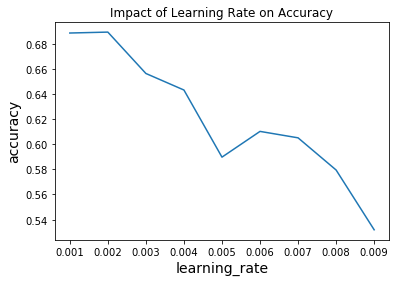

In [42]:
plt.title('Impact of Learning Rate on Accuracy')
plt.xlabel('learning_rate', fontsize=14)
plt.ylabel('accuracy', fontsize=14)
plt.plot(learning_rates, acc)

In [ ]:
#EPOCH FOR LOOP

In [43]:
### START CODING HERE ###
results2 = []
histories2 = []

epoch_rates = np.arange(20, 50, 1) 
for er in epoch_rates: 
    train_batch = train_tensor.shuffle(len(X_train)).batch(32)
    test_batch = test_tensor.shuffle(len(X_test)).batch(32)
    model= build_model()
    optimizer = tf.keras.optimizers.RMSprop(0.001) 
    model.compile(optimizer=optimizer, loss='sparse_categorical_crossentropy', metrics=['sparse_categorical_accuracy'])
    nn_clf_historystory2 = model.fit(train_batch, epochs=er)
    result2= model.evaluate(test_batch)
    print("lr",lr)

    results2.append(result2)
    histories2.append(nn_clf_historystory2)
    
### END CODING HERE ###

Epoch 1/20
171/171 [==============================] - 5s 29ms/step - loss: 1.0582 - sparse_categorical_accuracy: 0.5698
Epoch 2/20
171/171 [==============================] - 3s 20ms/step - loss: 0.6391 - sparse_categorical_accuracy: 0.7582: 2s - loss: 0.
Epoch 3/20
171/171 [==============================] - 3s 20ms/step - loss: 0.4863 - sparse_categorical_accuracy: 0.8181
Epoch 4/20
171/171 [==============================] - 3s 18ms/step - loss: 0.3999 - sparse_categorical_accuracy: 0.8502
Epoch 5/20
171/171 [==============================] - 3s 19ms/step - loss: 0.3343 - sparse_categorical_accuracy: 0.8723
Epoch 6/20
171/171 [==============================] - 3s 18ms/step - loss: 0.2715 - sparse_categorical_accuracy: 0.8936
Epoch 7/20
171/171 [==============================] - 4s 21ms/step - loss: 0.2186 - sparse_categorical_accuracy: 0.9165
Epoch 8/20
171/171 [==============================] - 3s 19ms/step - loss: 0.1701 - sparse_categorical_accuracy: 0.9344: 2s - los
Epoch 9/20
171/

171/171 [==============================] - 4s 22ms/step - loss: 0.0959 - sparse_categorical_accuracy: 0.9762: 3s - loss: 0.04
Epoch 14/25
171/171 [==============================] - 4s 23ms/step - loss: 0.0676 - sparse_categorical_accuracy: 0.9780: 3s - loss: 0.0526 - sparse_categorica - ETA: 2s - loss: 0.0643 
Epoch 15/25
171/171 [==============================] - 3s 19ms/step - loss: 0.0640 - sparse_categorical_accuracy: 0.9813: 0s - loss: 0.0641 - sparse_categorical_acc
Epoch 16/25
171/171 [==============================] - 3s 20ms/step - loss: 0.0705 - sparse_categorical_accuracy: 0.9822
Epoch 17/25
171/171 [==============================] - 3s 20ms/step - loss: 0.0669 - sparse_categorical_accuracy: 0.9819
Epoch 18/25
171/171 [==============================] - 4s 21ms/step - loss: 0.0752 - sparse_categorical_accuracy: 0.9868: 2s - loss: 0.0639 - spar
Epoch 19/25
171/171 [==============================] - 3s 18ms/step - loss: 0.0625 - sparse_categorical_accuracy: 0.9861
Epoch 20/25
1

171/171 [==============================] - 3s 18ms/step - loss: 0.0798 - sparse_categorical_accuracy: 0.9872
Epoch 23/29
171/171 [==============================] - 4s 21ms/step - loss: 0.0698 - sparse_categorical_accuracy: 0.9877
Epoch 24/29
171/171 [==============================] - 3s 20ms/step - loss: 0.0905 - sparse_categorical_accuracy: 0.9894: 1s - loss: 0.1274 - sparse_categorical_accuracy:  - ETA: 1s - loss: 0.1022 - sparse_catego
Epoch 25/29
171/171 [==============================] - 3s 18ms/step - loss: 0.0566 - sparse_categorical_accuracy: 0.9890
Epoch 26/29
171/171 [==============================] - 3s 20ms/step - loss: 0.0632 - sparse_categorical_accuracy: 0.9894- ETA: 3s - loss: 0.0238 - sparse_categorical_accuracy: 0.98 - ETA: 3s 
Epoch 27/29
171/171 [==============================] - 3s 19ms/step - loss: 0.0885 - sparse_categorical_accuracy: 0.9844: 0s - loss: 0.0855 - sparse_categorical_acc
Epoch 28/29
171/171 [==============================] - 4s 23ms/step - loss: 0.0

171/171 [==============================] - 4s 22ms/step - loss: 0.0572 - sparse_categorical_accuracy: 0.9868
Epoch 22/33
171/171 [==============================] - 3s 19ms/step - loss: 0.0623 - sparse_categorical_accuracy: 0.9879: 0s - loss: 0.0619 - sparse_categorical_a
Epoch 23/33
171/171 [==============================] - 3s 20ms/step - loss: 0.0531 - sparse_categorical_accuracy: 0.9886: 2s - loss: 0.0439 - 
Epoch 24/33
171/171 [==============================] - 3s 19ms/step - loss: 0.0608 - sparse_categorical_accuracy: 0.9886
Epoch 25/33
171/171 [==============================] - 3s 20ms/step - loss: 0.0777 - sparse_categorical_accuracy: 0.9896
Epoch 26/33
171/171 [==============================] - 4s 21ms/step - loss: 0.0565 - sparse_categorical_accuracy: 0.9896
Epoch 27/33
171/171 [==============================] - 3s 19ms/step - loss: 0.0504 - sparse_categorical_accuracy: 0.9888
Epoch 28/33
171/171 [==============================] - 3s 20ms/step - loss: 0.0662 - sparse_categoric

171/171 [==============================] - 4s 21ms/step - loss: 0.4130 - sparse_categorical_accuracy: 0.8454
Epoch 5/37
171/171 [==============================] - 3s 19ms/step - loss: 0.3541 - sparse_categorical_accuracy: 0.8683
Epoch 6/37
171/171 [==============================] - 3s 19ms/step - loss: 0.2929 - sparse_categorical_accuracy: 0.8886: 2s - loss
Epoch 7/37
171/171 [==============================] - 3s 19ms/step - loss: 0.2377 - sparse_categorical_accuracy: 0.9090: 1s - loss: 0.2292 - sparse
Epoch 8/37
171/171 [==============================] - 4s 22ms/step - loss: 0.1985 - sparse_categorical_accuracy: 0.9258
Epoch 9/37
171/171 [==============================] - 3s 18ms/step - loss: 0.1642 - sparse_categorical_accuracy: 0.9379: 3s - loss: 0.
Epoch 10/37
171/171 [==============================] - 3s 20ms/step - loss: 0.1319 - sparse_categorical_accuracy: 0.9511
Epoch 11/37
171/171 [==============================] - 3s 18ms/step - loss: 0.1236 - sparse_categorical_accuracy: 0.

171/171 [==============================] - 4s 22ms/step - loss: 0.1404 - sparse_categorical_accuracy: 0.9566: 2s - loss: 0.1008 - sparse_ - ETA: 0s - loss: 0.1479 - sparse_categorical_
Epoch 11/40
171/171 [==============================] - 4s 21ms/step - loss: 0.1130 - sparse_categorical_accuracy: 0.9603
Epoch 12/40
171/171 [==============================] - 3s 20ms/step - loss: 0.1122 - sparse_categorical_accuracy: 0.9668
Epoch 13/40
171/171 [==============================] - 3s 20ms/step - loss: 0.1060 - sparse_categorical_accuracy: 0.9740: 1s - loss: 0.1136 - spars
Epoch 14/40
171/171 [==============================] - 4s 22ms/step - loss: 0.0781 - sparse_categorical_accuracy: 0.9780: 1s - loss: 0.0703 - sparse_categor
Epoch 15/40
171/171 [==============================] - 3s 19ms/step - loss: 0.0813 - sparse_categorical_accuracy: 0.9797A: 4s 
Epoch 16/40
171/171 [==============================] - 3s 20ms/step - loss: 0.0872 - sparse_categorical_accuracy: 0.9795
Epoch 17/40
171/171 

171/171 [==============================] - 3s 19ms/step - loss: 0.0549 - sparse_categorical_accuracy: 0.9897
Epoch 30/41
171/171 [==============================] - 3s 17ms/step - loss: 0.0442 - sparse_categorical_accuracy: 0.9910
Epoch 31/41
171/171 [==============================] - 3s 19ms/step - loss: 0.0887 - sparse_categorical_accuracy: 0.9921: 2s - loss: 0.
Epoch 32/41
171/171 [==============================] - 3s 19ms/step - loss: 0.0517 - sparse_categorical_accuracy: 0.9925
Epoch 33/41
171/171 [==============================] - 3s 19ms/step - loss: 0.0287 - sparse_categorical_accuracy: 0.9927
Epoch 34/41
171/171 [==============================] - 3s 17ms/step - loss: 0.0368 - sparse_categorical_accuracy: 0.9916- ETA: 3s - loss: 7.4
Epoch 35/41
171/171 [==============================] - 3s 19ms/step - loss: 0.2037 - sparse_categorical_accuracy: 0.9905: 1s - loss: 0.2943 - sparse_cate
Epoch 36/41
171/171 [==============================] - 3s 19ms/step - loss: 0.0559 - sparse_cate

171/171 [==============================] - 3s 19ms/step - loss: 0.3221 - sparse_categorical_accuracy: 0.8723
Epoch 6/43
171/171 [==============================] - 3s 19ms/step - loss: 0.2631 - sparse_categorical_accuracy: 0.8962
Epoch 7/43
171/171 [==============================] - 3s 19ms/step - loss: 0.2117 - sparse_categorical_accuracy: 0.9179: 3s - 
Epoch 8/43
171/171 [==============================] - 3s 19ms/step - loss: 0.1691 - sparse_categorical_accuracy: 0.9352: 0s - loss: 0.1703 - sparse_categorical_accuracy: 0.9
Epoch 9/43
171/171 [==============================] - 3s 18ms/step - loss: 0.1724 - sparse_categorical_accuracy: 0.9487
Epoch 10/43
171/171 [==============================] - 3s 18ms/step - loss: 0.1275 - sparse_categorical_accuracy: 0.9570
Epoch 11/43
171/171 [==============================] - 3s 18ms/step - loss: 0.1080 - sparse_categorical_accuracy: 0.9663
Epoch 12/43
171/171 [==============================] - 3s 19ms/step - loss: 0.1037 - sparse_categorical_accu

171/171 [==============================] - 3s 18ms/step - loss: 0.0658 - sparse_categorical_accuracy: 0.9923: 0s - loss: 0.0450 - sparse_categorical_accuracy:  - ETA: 0s - loss: 0.0740 - sparse_categorical_accuracy:
Epoch 40/45
171/171 [==============================] - 3s 20ms/step - loss: 0.1482 - sparse_categorical_accuracy: 0.9912: 1s - loss: 0.2135 - sparse_cate
Epoch 41/45
171/171 [==============================] - 3s 20ms/step - loss: 0.0273 - sparse_categorical_accuracy: 0.9940: 3s - loss: 
Epoch 42/45
171/171 [==============================] - 3s 19ms/step - loss: 0.0713 - sparse_categorical_accuracy: 0.9892: 1s - loss: 0.0582 - sp
Epoch 43/45
171/171 [==============================] - 3s 18ms/step - loss: 0.0438 - sparse_categorical_accuracy: 0.9930: 2s - loss: 0.
Epoch 44/45
171/171 [==============================] - 3s 19ms/step - loss: 0.2210 - sparse_categorical_accuracy: 0.9883
Epoch 45/45
43/43 [==============================] - 1s 14ms/step - loss: 10.0505 - sparse_cat

Epoch 8/47
171/171 [==============================] - 3s 18ms/step - loss: 0.1777 - sparse_categorical_accuracy: 0.9300
Epoch 9/47
171/171 [==============================] - 3s 20ms/step - loss: 0.1477 - sparse_categorical_accuracy: 0.9451
Epoch 10/47
171/171 [==============================] - 3s 18ms/step - loss: 0.1206 - sparse_categorical_accuracy: 0.9586
Epoch 11/47
171/171 [==============================] - 3s 18ms/step - loss: 0.1034 - sparse_categorical_accuracy: 0.9654
Epoch 12/47
171/171 [==============================] - 3s 18ms/step - loss: 0.0770 - sparse_categorical_accuracy: 0.9751
Epoch 13/47
171/171 [==============================] - 3s 19ms/step - loss: 0.0952 - sparse_categorical_accuracy: 0.9777
Epoch 14/47
171/171 [==============================] - 3s 19ms/step - loss: 0.0678 - sparse_categorical_accuracy: 0.9813: 1s - loss: 0.0722 - sparse_categorica
Epoch 15/47
171/171 [==============================] - 3s 19ms/step - loss: 0.0793 - sparse_categorical_accuracy: 0.

171/171 [==============================] - 4s 22ms/step - loss: 0.0759 - sparse_categorical_accuracy: 0.9918
Epoch 36/49
171/171 [==============================] - 4s 21ms/step - loss: 0.0497 - sparse_categorical_accuracy: 0.9918: 3s 
Epoch 37/49
171/171 [==============================] - 4s 21ms/step - loss: 0.0425 - sparse_categorical_accuracy: 0.9905
Epoch 38/49
171/171 [==============================] - 4s 24ms/step - loss: 0.1137 - sparse_categorical_accuracy: 0.9905
Epoch 39/49
171/171 [==============================] - 4s 22ms/step - loss: 0.0601 - sparse_categorical_accuracy: 0.9930: 2s - loss: 0.0110 - 
Epoch 40/49
171/171 [==============================] - 3s 19ms/step - loss: 0.0396 - sparse_categorical_accuracy: 0.9932
Epoch 41/49
171/171 [==============================] - 3s 19ms/step - loss: 0.0547 - sparse_categorical_accuracy: 0.9885
Epoch 42/49
171/171 [==============================] - 3s 19ms/step - loss: 0.0849 - sparse_categorical_accuracy: 0.9907A: 4s - loss: 0.04

In [44]:
print(len(results))
acc2 = [x[1] for x in results2]
acc2

9


[0.6879121,
 0.6893773,
 0.6754579,
 0.6952381,
 0.6761905,
 0.6666667,
 0.6959707,
 0.6915751,
 0.6908425,
 0.6864469,
 0.6857143,
 0.7054945,
 0.6901099,
 0.6710623,
 0.6747253,
 0.6901099,
 0.6864469,
 0.6901099,
 0.6820513,
 0.6967033,
 0.6864469,
 0.6930403,
 0.6791209,
 0.6783883,
 0.6886447,
 0.6835165,
 0.6930403,
 0.6923077,
 0.6915751,
 0.6630037]

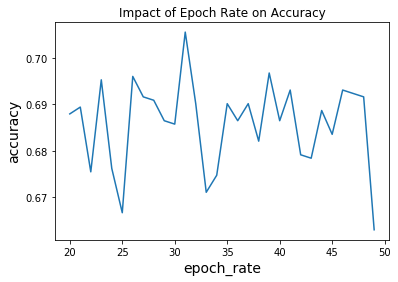

In [63]:
plt.title('Impact of Epoch Rate on Accuracy')
plt.xlabel('epoch_rate', fontsize=14)
plt.ylabel('accuracy', fontsize=14)
plt.plot(epoch_rates, acc2)

In [46]:
# Get class probabilities for nn - ignore the warning
nn_preds = model.predict(X_test).ravel()

In [47]:
# See class probabilities predicted by nn classifier
nn_preds[:5]

array([6.2986372e-05, 3.2430018e-13, 9.9993706e-01, 6.1710921e-11,
       0.0000000e+00], dtype=float32)

In [ ]:
#EARLYSTOPPING

In [49]:
checkpoint_cb = tf.keras.callbacks.ModelCheckpoint("my_keras_model.h5",save_best_only=True)

In [50]:
### START CODING HERE ###
model = build_model()
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['sparse_categorical_accuracy']) 
early_stopping_cb = tf.keras.callbacks.EarlyStopping(patience=10, restore_best_weights=True)
history = model.fit(train_batch, epochs=1000, validation_data=(train_batch), callbacks=[checkpoint_cb, early_stopping_cb])
### END CODING HERE ###

Epoch 1/1000
171/171 [==============================] - 4s 22ms/step - loss: 1.0424 - sparse_categorical_accuracy: 0.5778 - val_loss: 0.0000e+00 - val_sparse_categorical_accuracy: 0.0000e+00
Epoch 2/1000
171/171 [==============================] - 3s 18ms/step - loss: 0.5594 - sparse_categorical_accuracy: 0.7797 - val_loss: 0.3573 - val_sparse_categorical_accuracy: 0.8685
Epoch 3/1000
171/171 [==============================] - 3s 20ms/step - loss: 0.4119 - sparse_categorical_accuracy: 0.8341 - val_loss: 0.2935 - val_sparse_categorical_accuracy: 0.8842
Epoch 4/1000
171/171 [==============================] - 3s 17ms/step - loss: 0.3298 - sparse_categorical_accuracy: 0.8601 - val_loss: 0.2442 - val_sparse_categorical_accuracy: 0.9040
Epoch 5/1000
171/171 [==============================] - 3s 20ms/step - loss: 0.2742 - sparse_categorical_accuracy: 0.8879 - val_loss: 0.2067 - val_sparse_categorical_accuracy: 0.9233
Epoch 6/1000
171/171 [==============================] - 3s 19ms/step - loss: 

In [51]:
model.evaluate(test_batch)

43/43 [==============================] - 0s 5ms/step - loss: 2.4843 - sparse_categorical_accuracy: 0.6916


[2.4842509724373043, 0.6915751]

In [52]:
# Hyperparameter tuning code here

# Add more cells when/if necessary for hyperparameter tuning

In [53]:
#RUN 20 EPOCH WITH A TEST SIZE OF 0.33

In [54]:
# Split the data to train and test with test_size=0.33 and random_state=66
### START CODING HERE ###
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30)
### END CODING HERE ###

print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(4777, 1678)
(4777,)
(2048, 1678)
(2048,)


In [55]:
# Load train and test data to tf
train_tensor = tf.data.Dataset.from_tensor_slices((X_train.values, y_train.values))
test_tensor = tf.data.Dataset.from_tensor_slices((X_test.values, y_test.values))

In [56]:
type(train_tensor)

tensorflow.python.data.ops.dataset_ops.TensorSliceDataset

In [57]:
for feat, targ in train_tensor.take(5):
  print ('Features: {}, Target: {}'.format(feat, targ))

Features: [ 0.84612057 -0.11834324 -0.32893862 ... -0.01210455 -0.01711967
 -0.01210455], Target: 2
Features: [-0.10371666 -0.37677181 -0.34348768 ... -0.01210455 -0.01711967
 -0.01210455], Target: 0
Features: [ 0.60866126 -0.30441181 -0.32893862 ... -0.01210455 -0.01711967
 -0.01210455], Target: 2
Features: [ 0.13374265 -0.33542324 -0.34348768 ... -0.01210455 -0.01711967
 -0.01210455], Target: 1
Features: [ 1.32103918  0.85334816  0.44216116 ... -0.01210455 -0.01711967
 -0.01210455], Target: 3


In [58]:
# Batch train and test data
train_batch = train_tensor.shuffle(len(X_train)).batch(10)
test_batch = test_tensor.shuffle(len(X_test)).batch(10)

print(type(train_batch))
print(type(test_batch))

<class 'tensorflow.python.data.ops.dataset_ops.BatchDataset'>
<class 'tensorflow.python.data.ops.dataset_ops.BatchDataset'>


In [59]:
### START CODING HERE ###
# Build a Sequential neural network - a classifier model
def build_model():
    nn_clf = tf.keras.Sequential([
        # Create a dense layer with 1000 units, input_dim=1678, and 'relu' activation function ~ 1 line
        tf.keras.layers.Dense(1000, input_dim=1678, activation='relu'), 
        # Create a dense layer with 500 units, and 'relu' activation function 
        tf.keras.layers.Dense(500, activation='relu'),
        tf.keras.layers.Dense(200, activation='relu'), 
        tf.keras.layers.Dense(70, activation='relu'), 
        tf.keras.layers.Dense(20, activation='relu'), 
      
        #output layer
        tf.keras.layers.Dense(7, activation='softmax')
        ])  
    return nn_clf
### END CODING HERE ###

In [60]:
### START CODING HERE ###
# Compile the model 
model = build_model()
optimizer = tf.keras.optimizers.RMSprop(0.001)
model.compile(optimizer=optimizer, loss='sparse_categorical_crossentropy', metrics=['sparse_categorical_accuracy']) 
### END CODING HERE ###

In [61]:
 nn_clf_historystory = model.fit(train_batch, epochs=20)

Epoch 1/20
478/478 [==============================] - 10s 22ms/step - loss: 1.0886 - sparse_categorical_accuracy: 0.5514
Epoch 2/20
478/478 [==============================] - 8s 17ms/step - loss: 0.7222 - sparse_categorical_accuracy: 0.7314: 4s - loss: 0.6933 - sparse_categoric - ETA: 
Epoch 3/20
478/478 [==============================] - 8s 16ms/step - loss: 0.5920 - sparse_categorical_accuracy: 0.7867: 1s - loss: 0.5661 - sparse_
Epoch 4/20
478/478 [==============================] - 8s 17ms/step - loss: 0.5137 - sparse_categorical_accuracy: 0.8216
Epoch 5/20
478/478 [==============================] - 8s 17ms/step - loss: 0.4395 - sparse_categorical_accuracy: 0.8499
Epoch 6/20
478/478 [==============================] - 8s 16ms/step - loss: 0.3907 - sparse_categorical_accuracy: 0.8648
Epoch 7/20
478/478 [==============================] - 8s 16ms/step - loss: 0.3669 - sparse_categorical_accuracy: 0.8861: 6s - loss: 0.3024 
Epoch 8/20
478/478 [==============================] - 8s 16ms/st

In [62]:
### START CODING HERE ###
# evaluate nn_clf model on test_batch using .evaluate method
model.evaluate(test_batch)
### END CODING HERE ###

205/205 [==============================] - 1s 6ms/step - loss: 7.1076 - sparse_categorical_accuracy: 0.6997


[7.107590169960451, 0.69970703]

## Results

Your results must include at least one comparison table and two plots (for groups 4 plots required).

### Comparison Table

You should compare all of the methods in one or multiple tables, showing clearly the method names, the metrics used for comparison and the results (accuracy, scores, loss, etc). You may use [online tools such as this](https://www.tablesgenerator.com/markdown_tables) for generating and editing neatly-formatted tables in Markdown. You can then copy the code to your Markdown cell to generate the plot. Groups should add more rows/columns as required.
<br>

<b>Notice: </b>You should use at least two different metrics for comparison of your methods.

#### Your comparison table HERE:<br><br>

| Metric/Method                    | Method 1 Random Forest| Method 2 MLP| Method 3 Neural Network|
|:----------------------------------:|:---------------------:|:-----------:|:----------------------:|
|Metric 1 Accuracy                   |           49%         |    64%      |        67-69%          |
|Metric 2 Percision Weighted Average |           70%         |    80%      |         71%            |

### Plots

Using meaningful plots is an efficient way to visualize and conlude your experiments as well as results. Examples of acceptable plots include but are not limited to:
- ROC curve (can be used with classification only)
- loss plots (precision/recall for classification, mse or mae for regression)
- hyperparameter tuning plots (varying one hyperparameter using for loops on x-axis and accuracy/loss on y-axis)
- train/validation/test errors/loss plots, histogram of errors and so on.

<b>Notice:</b> All plots should have title, xlabel, ylabel, and (if applicable) legend. Use different colors if you have multiple curves on one plot. Points will be deducted if your plots are incomplete. Check matplotlib documentation, examples from the assignments, and research papers or ML articles and find those plots that are applicable to your project. Individual students should have at least 2 plots while groups should have at least 4 plots.


## <font color="red"> Required Coding - Groups should add more cell as required

In [ ]:
#SEE ABOVE FOR PLOTS AND PLOT CODE

In [ ]:
# Plot-1 code here

In [ ]:
# Plot-2 code here

## Discussion

Write at least two paragraphs to describe and discuss your results. Make arguments based on your observations and results. Use reasoning and analytical thinking for your discussion.

Of the two sklearn models I chose, MLPClassifier with an accuracy of 63% performed better than Random Forest Classifier that had an accuracy of 49%.  The tensorflow method performed the best of the three methods.  I ran it about four times.  It usually gave about a 68-69% accuracy which is pretty good.  I also tried the four different activation functions for the MLPClassifier and they all gave about the same accuracy except for the logistic activation which gave the lowest accuaracy at about 40%.  I tried changing many hyperperameters for the Random Forest Calssifier, but for whatever I changed, the accuracy only increased or decreased by about 1-2%.  I changed the number of hidden layers for the neural network as well as the final amount.  The current layers appeared to have the best result.
 
There are two for-loops that were created to check the learning rate accuracy and the epoch accuracy.  From the graph for the learning rate accuracy we can see that as the learning rate increases, the accuracy decreases.  There is a slight increase in accuracy at around 0.006 learning rate, but that still is not as good as the initial learning rate of 0.001 which gave the best accuracy.  As a result of this, I set the learning rate for the other neural networks at 0.001 as well.  For the epoch graph, it seems pretty random, but it also appears that the better accuracy is at about 30 epochs.  However, that is not always guaranteed.  I also changed the test size from 0.20 to 0.33.  I ran it for 30 epochs and got a 69% accuracy.  That may indicate that the larger a test size is, the greater the accuracy.  The precision weighted average of all of the methods was especially good.  This may be because three of the outputs are only in the file a few times, so the accuracy went down.  It is somewhat surprising that the overall best accuracy was the neural network, but it had the second to best percision weighted accuracy of the three.  The Random Forest Classifier had a 100% accuracy for the second output, which is very good considering it performed the worst of the three classifiers.   

<b>Notice:</b> Having a thorough discussion is VERY important and has a significant impact on your final score!

## Grading

Project grading rubric (total 100 points - 20% of the final grade):

- Project proposal: 10 points

- Final submission: 70 points - Breakdown as follows

    - 30 points: Methods, hyperparameter tuning and comparison table
    
    - 20 points: Plots

    - 20 points: Discussion (2 paragraphs)
    
- Project complexity and intellectual efforts judged by the instructor: 20 points
    
<b>Notice:</b> similar to the assignments, up to 10 points may be deducted if your notebook is not easy to read and/or has spelling/grammatical errors, so proofread your notebook!

## How to Submit and Due Date - Late Penalty Will be Strictly Applied!

Name your final project notebook ```Lastname-Project.ipynb```. Submit the notebook file with your dataset file in a zip file named EXACTLY as `Lastname-Project.zip` using the ```Final Project``` link on Blackboard. For groups, only one submission is required.

<font color=red><b>Project Final Submission Due Date: Monday Dec 9th 11:59PM.</b></font>